# SCML 2024 Project - ECG-based heart rate classification


This dataset consists of a collection of heartbeat signals from a well-known dataset in the field of heartbeat classification, the MIT-BIH arrhythmia dataset.

The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and cases affected by various arrhythmias and myocardial infarctions. These signals are pre-processed and segmented, with each segment corresponding to a heartbeat.


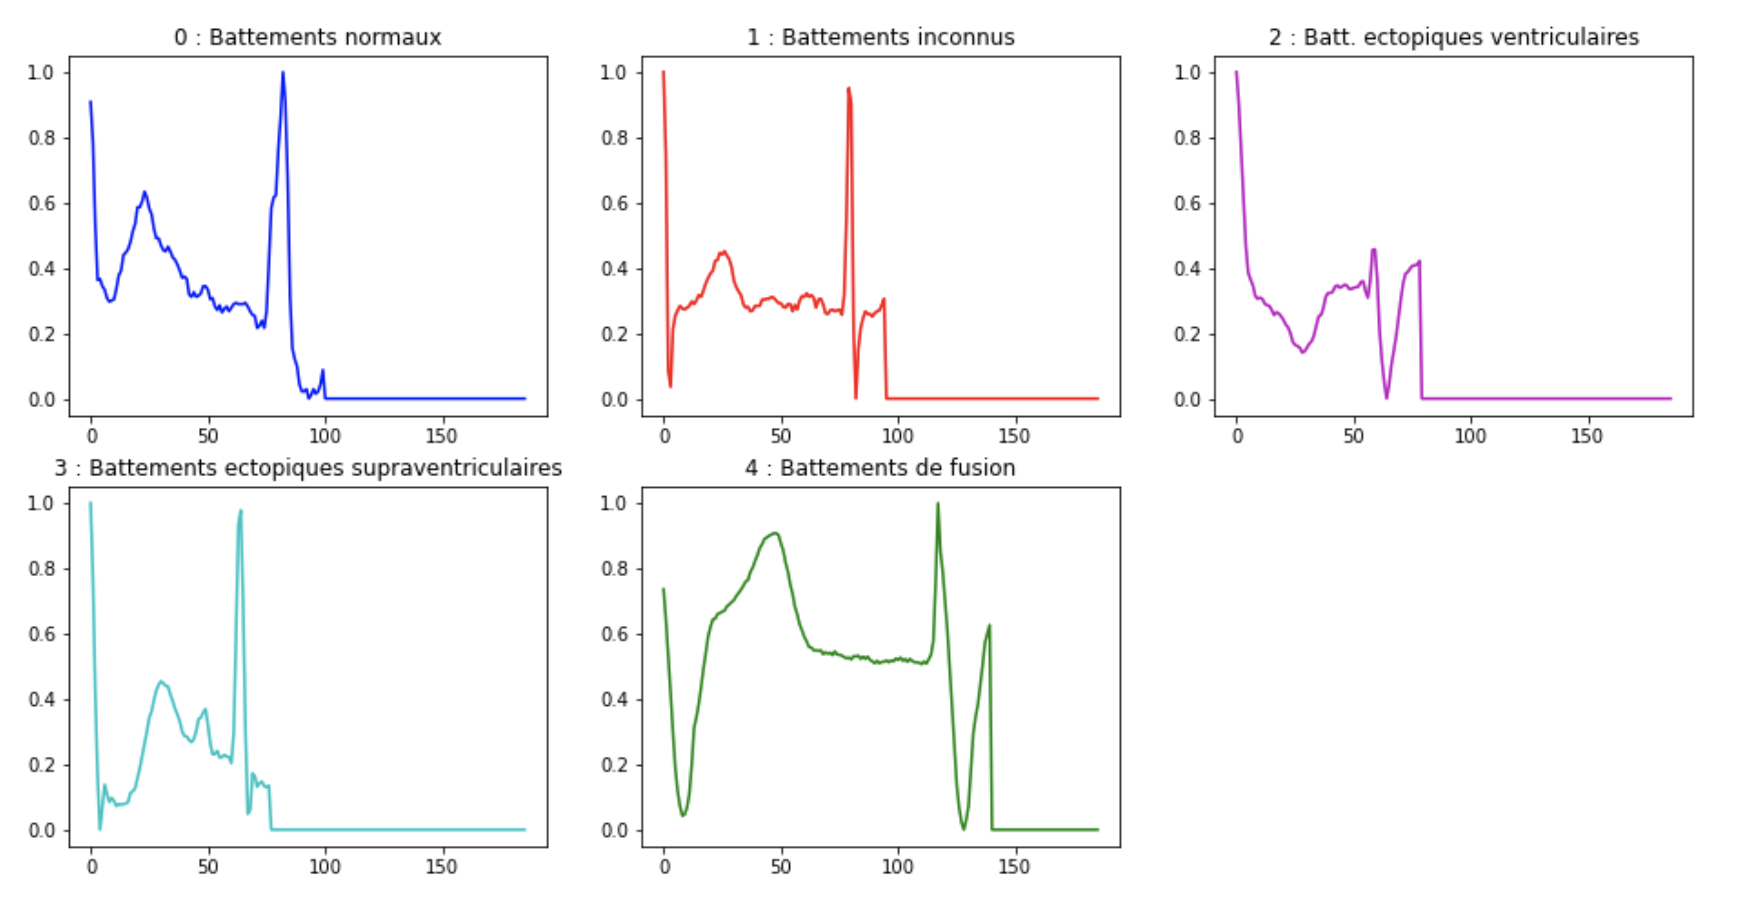

There are 5 different heartbeats: Normal beats', “Unknown beats”, “Ventricular ectopic beats”, “Supraventricular ectopic beats” and “Fusion beats”.

Features are extracted from these signals using the TSFEL - *Time Series Features Extraction Library* (https://tsfel.readthedocs.io/en/latest/index.html)

The 156 features extracted are divided into the following domains:
- time, with 31 features such as entropy, Max, Min, Absolute Energy, etc.
- statistical, with 14 features such as mean absolute deviation, median deviation, variance, Kurtosis, etc.
- spectral with 111 features such as FFT coefficients per frequency band, wavelets, etc.

Link to the paper explaining TSFEL :  https://www.sciencedirect.com/science/article/pii/S2352711020300017

In [ ]:
# Useful libraries
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading training and test data

In [ ]:
# Loading training set
DataFeatureTrain=np.load('./DataTrain.npy')
LabelTrain=np.load('./LabelTrain.npy')
print('Training base size:', DataFeatureTrain.shape, LabelTrain.shape)

# Loading test set
DataFeatureTest=np.load('./DataTest.npy')
LabelTest=np.load('./LabelTest.npy')
print('Test base size:', DataFeatureTest.shape, LabelTest.shape)

# Loading of variables from *TSFEL*.

In [ ]:
ListVariablesStat=np.load('./ListVariableStat.npy',allow_pickle=True)
print('Number of statistical variables :',ListVariablesStat.shape)
#print('List of Statistical Variables  :', ListVariablesStat)

ListVariablesTime=np.load('./ListVariableTemps.npy',allow_pickle=True)
print('Number of temporal variables:',ListVariablesTime.shape)
#print('List of temporal variables :',ListVariablesTime)

ListVariablesSpectral=np.load('./ListVariableSpectral.npy',allow_pickle=True)
print('Number of spectral variables :',ListVariablesSpectral.shape)
#print('List of spectral variables :',ListVariablesSpectral)

### Functions for creating a correspondence table between the label of unsupervised approaches and the real label

In [ ]:
def retrieve_info(cluster_labels,y_train):
 #Associates the most likely label with each cluster in the KMeans model.
 #Results: dictionary of clusters associated with each label.

# Initialization
  reference_labels = np.zeros((len(np.unique(cluster_labels)),1))
# Loop for each label
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

def correspondence(y_pred_kmeans,y_train):
  # Correspondence between partition and ground truth classes
  reference_labels = retrieve_info(y_pred_kmeans,y_train)
  number_labels = np.zeros(len(y_pred_kmeans))
  for i in range(len(y_pred_kmeans)):
    number_labels[i] = reference_labels[y_pred_kmeans[i]]
  return number_labels


# Part I: Classification of heartbeats without pre-processing

Carry out a classification of heartbeats using a supervised learning method and an unsupervised learning method of your choice, using either the codes from the previous exercises or the *scikit-learn* library.

For each result obtained, calculate the confusion matrix and interpret the results.

## Supervised methods :
Indicate the 2 supervised methods of your choice and calculate the associated confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix

#confusion_matrix(y_true, y_pred)

## Unsupervised methods

Indicate the 2 unsupervised methods of your choice and calculate the associated confusion matrix.

...

In [ ]:
# ...

# Part II: Heartbeat classification with PCA preprocessing

## Supervised method with dimension reduction using PCA on the training set
Perform a PCA on the training set to reduce the dimension, visualise the data
then project the test set data into the PCA base.

Indicate the 2 supervised methods of your choice and calculate the associated confusion matrix (confusion_matrix) and performance score (accuracy_score).

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# ...

In [ ]:
# Confusion matrix

# ...


## Unsupervised method with dimension reduction by PCA on all the data

Perform a PCA on all the data and indicate the unsupervised methods of your choice and calculate the associated confusion matrix (confusion_matrix) and the performance score (accuracy_score).

In [ ]:
# ...

In [ ]:
# Confusion matrix


In [ ]:
# ...


# Your study :

- Study the best parameters for the supervised and unsupervised methods you have chosen.
- Carry out a study on the parameters obtained from TSFEL, for example by separating the different modalities (statistical, temporal and spectral) or by studying their correlation, and try to carry out pre-processing.
- Optimise dimension reduction using PCA

In [ ]:
# ...